In [ ]:
# Predicting malaria

Features

Body temp
Headache
appetite
eye color
body pain
height
shivering
weakness
tastebuds sensitivity
nausea
race
skin color

hasMalaria


In [1]:
import pandas as pd

In [2]:
file = file = r"C:\Users\stanl\Documents\workspace\diabetes.csv"

df = pd.read_csv(file)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

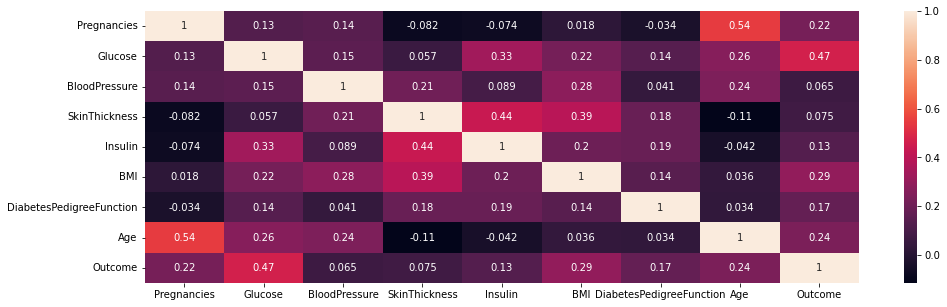

In [6]:
# Step 1: Identify presence of multicolinearity in the data

import seaborn as sb
import matplotlib.pyplot as plt


plt.figure(figsize=(16,5))

sb.heatmap(df.corr(), annot=True)

#Objective: 

'''
if any two features have a correlation score greater than 0.8, this indicates the presence of multicolinearity
We will need to drop one of the features from our data

'''

<AxesSubplot:>

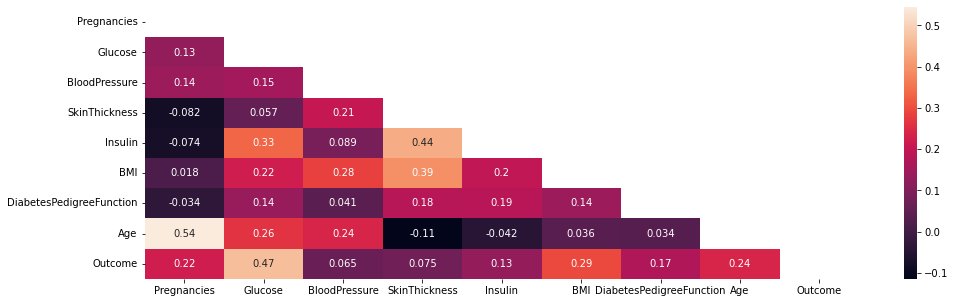

In [7]:
import numpy as np
matrix = np.triu(df.corr())
plt.figure(figsize = (16,5))
sb.heatmap(df.corr(), annot=True, mask=matrix)

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
#Univariate Feature selection


from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

dfArr = df.values
X = dfArr[:, :8]
Y = dfArr[:,8]

test = SelectKBest(score_func=chi2, k=5)

fit = test.fit(X,Y)

print(fit.scores_)

features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]
[[  6.  148.    0.   33.6  50. ]
 [  1.   85.    0.   26.6  31. ]
 [  8.  183.    0.   23.3  32. ]
 [  1.   89.   94.   28.1  21. ]
 [  0.  137.  168.   43.1  33. ]]


In [14]:
# Returning ONLY 6 features

#Univariate Feature selection


from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

dfArr = df.values
X = dfArr[:, :8]
Y = dfArr[:,8]

test = SelectKBest(score_func=chi2, k=6)

fit = test.fit(X,Y)

print(fit.scores_)

features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]
[[  6.  148.   35.    0.   33.6  50. ]
 [  1.   85.   29.    0.   26.6  31. ]
 [  8.  183.    0.    0.   23.3  32. ]
 [  1.   89.   23.   94.   28.1  21. ]
 [  0.  137.   35.  168.   43.1  33. ]]


In [29]:
# Testing the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
Pred = model.fit(X,Y)
score = model.score(X,Y)

In [28]:
score

0.76953125

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
x = df[['Pregnancies', 'Glucose',  'SkinThickness', 'Insulin',
       'BMI', 'Age']]
X = x.values
Y = Y

model = LogisticRegression(max_iter=1000)
Pred = model.fit(X,Y)
score = model.score(X,Y)
score

0.76953125

In [26]:
0.77/0.78

0.9871794871794871